#Directory

In [50]:
%cd /content/drive/MyDrive/Data Mining for Business in Python/1. Survival Analysis

[WinError 3] The system cannot find the path specified: '/content/drive/MyDrive/Data Mining for Business in Python/1. Survival Analysis'
C:\Users\Ηλίας\Desktop\Projects Python\Data Mining\Data Mining for Business in Python\2. Cox Proportional Hazard Regression


#Libraries

In [51]:
#install library
!pip install lifelines

In [52]:
#import libraries
import pandas as pd

# data

In [53]:
#import dataset
dataset = pd.read_csv("lung.csv")
dataset=dataset.dropna()
dataset.head()                                   

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
5,12.0,1022,1,74,1,1.0,50.0,80.0,513.0,0.0
6,7.0,310,2,68,2,2.0,70.0,60.0,384.0,10.0
7,11.0,361,2,71,2,2.0,60.0,80.0,538.0,1.0


In [54]:
#transforming dependent variable
dataset.loc[dataset.status == 1, "status"] = 0
dataset.loc[dataset.status == 2, "status"] = 1
dataset.head

<bound method NDFrame.head of      inst  time  status  age  sex  ph.ecog  ph.karno  pat.karno  meal.cal  \
1     3.0   455       1   68    1      0.0      90.0       90.0    1225.0   
3     5.0   210       1   57    1      1.0      90.0       60.0    1150.0   
5    12.0  1022       0   74    1      1.0      50.0       80.0     513.0   
6     7.0   310       1   68    2      2.0      70.0       60.0     384.0   
7    11.0   361       1   71    2      2.0      60.0       80.0     538.0   
..    ...   ...     ...  ...  ...      ...       ...        ...       ...   
221  11.0   203       0   71    2      1.0      80.0       90.0    1025.0   
224  13.0   191       0   39    1      0.0      90.0       90.0    2350.0   
225  32.0   105       0   75    2      2.0      60.0       70.0    1025.0   
226   6.0   174       0   66    1      1.0      90.0      100.0    1075.0   
227  22.0   177       0   58    2      1.0      80.0       90.0    1060.0   

     wt.loss  
1       15.0  
3       11.0  


In [55]:
#Remove instances variables. We have to drop instances because in COX Proportional Hazard we need every row to be someone.
dataset=dataset.drop(columns="inst")
dataset.head()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
3,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
5,1022,0,74,1,1.0,50.0,80.0,513.0,0.0
6,310,1,68,2,2.0,70.0,60.0,384.0,10.0
7,361,1,71,2,2.0,60.0,80.0,538.0,1.0


# Cox ProportionaL Hazard 

In [56]:
#CHP
from lifelines import CoxPHFitter
model=CoxPHFitter()
model.fit(dataset,
                 "time",
                 event_col="status")
model.print_summary()

<lifelines.CoxPHFitter: fitted with 167 total observations, 47 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 167
number of events observed = 120
   partial log-likelihood = -494.03
         time fit was run = 2022-08-03 16:26:46 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
sex        -0.55       0.57       0.20            -0.95            -0.16                 0.39                 0.85
ph.ecog     0.74       2.09       0.22             0.30             1.18                 1.35                 3.26
ph.karno    0.02       1.02       0.01             0.00             0.04                 1.00                 1.05
pat.karno  -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00
meal.cal    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00

            cmp to     z      p   -log2(p)
covariate                                 
age           0.00  0.93   0.35       1.51
sex           0.00 -2.75   0.01       7.37
ph.ecog       0.00  3.29 <0.005       9.95
ph.karno      0.00  2.00   0.05       4.45
pat.karno     0.00 -1.49   0.14       2.87
meal.cal      0.00  0.11   0.91       0.13
wt.loss       0.00 -1.83   0.07       3.89
---
Concordance = 0.65
Partial AIC = 1002.07
log-likelihood ratio test = 28.16 on 7 df
-log2(p) of ll-ratio test = 12.25

In [57]:
#Everything above 0.05 is considered statistically insignificant
# Sex, ph.ecog are statistically singnificant.Notes: If exp(coef ) is above one , then it is a positive impact and increases the likelihood and if it is below one it decreases the likelihood.
#So the bigger this , p h then the greater the likelihood of death.Also check that if someone is losing weight , then this increases the probability of death. If you are female you have a greater likelihood of survival.

# Visualization

<AxesSubplot:xlabel='log(HR) (95% CI)'>

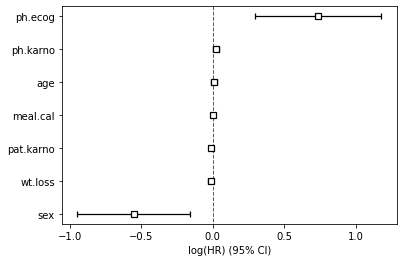

In [58]:
model.plot()